<a href="https://colab.research.google.com/github/MrPokko/MachineLearning_Ganjil/blob/main/JobSheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['region'] = le.fit_transform(dataset['region'])

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
dataset.head()
dataset.shape
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


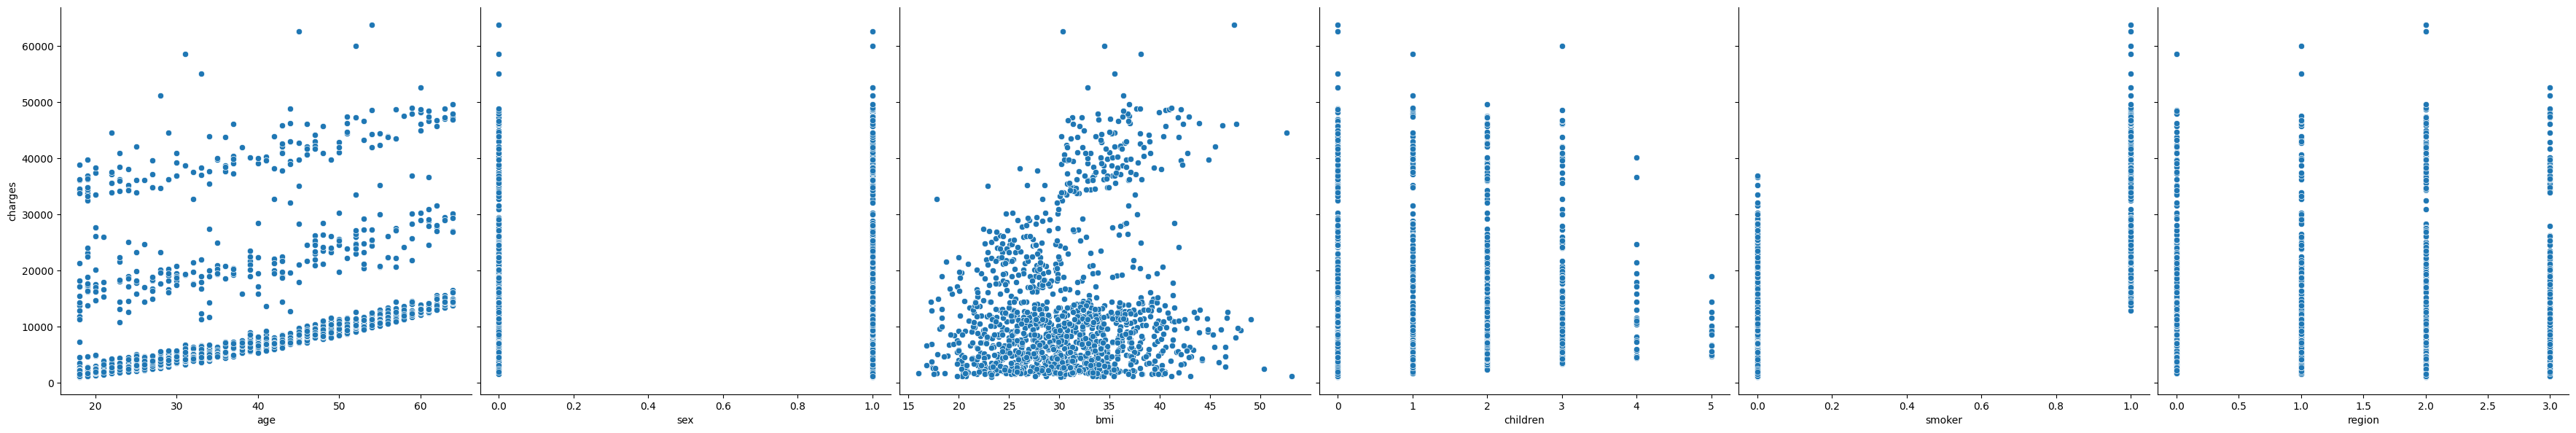

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dataset, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', size=6, aspect=1, kind='scatter')
plt.show()

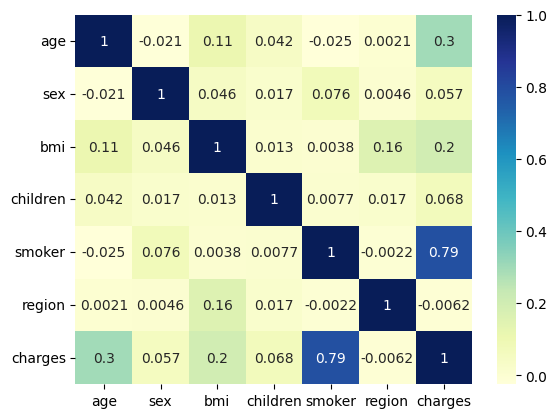

In [9]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [12]:
x = dataset[['age', 'smoker']]
y = dataset['charges'].values

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
print("akurasi/R-Squared:", r2)
print("mean Squared Error (MSE):", mse)
print("neab absolute Error (MSE):", mse)

akurasi/R-Squared: 0.7534620778716639
mean Squared Error (MSE): 0.32968357098527895
neab absolute Error (MSE): 0.32968357098527895
